## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

### Case of Study 02: Credit Score Classification

- The dataset consists of 100,000 rows and 27 columns representing individuals’ demographic and financial  
information, including a credit score rating.  
- The data is collected from the database of customers of a US financial institution. Individuals aged 14
to 65 form part of the dataset.  
- The data includes information regarding individual income, number of loans, payment behavior, and investments.  
- The credit score may be rated as good, standard, or poor.   

#### 1. Load the dataset

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import preprocess

In [3]:
# load train and test set
dataset = pd.read_csv("dataset/credit_train.csv", sep = ",", low_memory = False)
test_set = pd.read_csv("dataset/credit_test.csv", sep = ",", low_memory = False)
dataset.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
# dimensions of dataset
print("#Train-samples = ", dataset.shape[0])
print("#Train-features = ", dataset.shape[1])
print("#Test-samples = ", test_set.shape[0])
print("#Test-features = ", test_set.shape[1])

#Train-samples =  100000
#Train-features =  28
#Test-samples =  50000
#Test-features =  27


In [5]:
# definition of preprocessor
dp = preprocess.DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 28 
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
Numerical features: 
 ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Categorical features: 
 ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Cred

#### 2. Data Cleaning

Type of loan

In [6]:
dataset["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object

In [7]:
def clean_type_of_loan(frame):
    frame["auto_loan"] = frame["Type_of_Loan"].str.lower().str.contains("auto loan").astype(bool)
    frame["credit-builder_loan"] = frame["Type_of_Loan"].str.lower().str.contains("credit-builder loan").astype(bool)
    frame["debt_consolidation_loan"] = frame["Type_of_Loan"].str.lower().str.contains("debt consolidation loan").astype(bool)
    frame["home_equity_loan"] = frame["Type_of_Loan"].str.lower().str.contains("home equity loan").astype(bool)
    frame["mortgage_loan"] = frame["Type_of_Loan"].str.lower().str.contains("mortgage loan").astype(bool)
    frame["unspecified_loan"] = frame["Type_of_Loan"].str.lower().str.contains("not specified").astype(bool)
    frame["payday_loan"] = frame["Type_of_Loan"].str.lower().str.contains("payday loan").astype(bool)
    frame["personal_loan"] = frame["Type_of_Loan"].str.lower().str.contains("personal loan").astype(bool)
    frame["student_loan"] = frame["Type_of_Loan"].str.lower().str.contains("student loan").astype(bool)
    return frame

Age of credit history

In [8]:
dataset["Credit_History_Age"]

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [9]:
def clean_credit_age(age):
    if age == 'nan':
        return np.nan
    if not "Years" in age:
        return age
    years, months = age.split(" Years and ")
    months = months.replace(" Months", "")
    return int(years) + int(months) / 12

Clean outliers

In [10]:
def clean_outliers(frame):
    frame.loc[frame["Age"] > 65, "Age"] = 65
    frame.loc[frame["Num_Bank_Accounts"] > 1000, "Num_Bank_Accounts"] = 1000
    frame.loc[frame["Monthly_Balance"] > 1e6, "Monthly_Balance"] = np.nan
    return frame

Master function to clean data

In [11]:
cat_cols

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [12]:
dataset["Num_of_Delayed_Payment"].head(15)

0       7
1     NaN
2       7
3       4
4     NaN
5       4
6      8_
7       6
8       4
9       1
10     -1
11     3_
12      1
13      0
14      4
Name: Num_of_Delayed_Payment, dtype: object

In [13]:
# function to clean dataset
def clean_data(frame, is_test=False):
    # list of categorical columns, which in reality are numerical
    numeric_object_columns = ['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
    for col in numeric_object_columns:
        frame[col] = frame[col].astype(str).str.replace(r'[^\d\.]', '', regex=True)
        frame[col] = pd.to_numeric(frame[col], errors="coerce")
    # cleaning for age of credit history
    frame["Credit_History_Age"] = frame["Credit_History_Age"].astype(str).apply(clean_credit_age)
    frame["Credit_History_Age"] = pd.to_numeric(frame["Credit_History_Age"], errors="coerce")
    # cleaning for type of lean
    frame = clean_type_of_loan(frame)
    # cleaning for outliers values
    frame = clean_outliers(frame)
    # cleaning another non-sense values
    frame["Occupation"] = frame["Occupation"].astype(str).str.replace("_______", "")
    frame["Occupation"] = frame["Occupation"].astype(str).str.replace("nan", "")
    frame["Payment_Behaviour"] = frame["Payment_Behaviour"].astype(str).str.replace("!@9#%8", "")
    frame["Payment_Behaviour"] = frame["Payment_Behaviour"].astype(str).str.replace("nan", "")
    # drop all duplicate values
    frame = frame.drop_duplicates()
    # drop non-important columns
    frame = frame.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', "Type_of_Loan"], axis=1)
    # cleaning of incorrect values for number of bank accounts
    frame.loc[frame["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"] = np.nan
    # 
    for f in frame.columns:
        if is_test and f == "Credit_Score":
            break
        if f in num_cols:
            frame[f] = frame[f].fillna(frame[f].median())
        else:
            frame[f] = frame[f].fillna(frame[f].mode()[0])

    return frame

Cleaned dataset

In [14]:
dataset = clean_data(dataset)
dataset.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,auto_loan,credit-builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,unspecified_loan,payday_loan,personal_loan,student_loan
0,January,23,Scientist,19114.12,1824.843333,3.0,4,3,4,3,...,Good,True,True,False,True,False,False,False,True,False
1,February,23,Scientist,19114.12,3093.745000,3.0,4,3,4,1,...,Good,True,True,False,True,False,False,False,True,False
2,March,65,Scientist,19114.12,3093.745000,3.0,4,3,4,3,...,Good,True,True,False,True,False,False,False,True,False
3,April,23,Scientist,19114.12,3093.745000,3.0,4,3,4,5,...,Good,True,True,False,True,False,False,False,True,False
4,May,23,Scientist,19114.12,1824.843333,3.0,4,3,4,6,...,Good,True,True,False,True,False,False,False,True,False


Redefine metadata

In [15]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 32 
 Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'auto_loan', 'credit-builder_loan',
       'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan',
       'unspecified_loan', 'payday_loan', 'personal_loan', 'student_loan'],
      dtype='object')
Numerical features: 
 ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt

#### 3. Exploratory Data Analysis

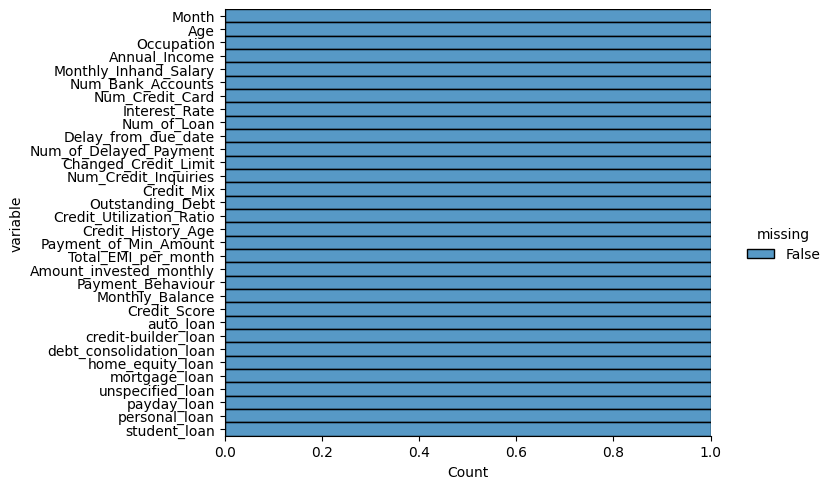

In [16]:
# filter missing values
dp.filter_missing(dataset)

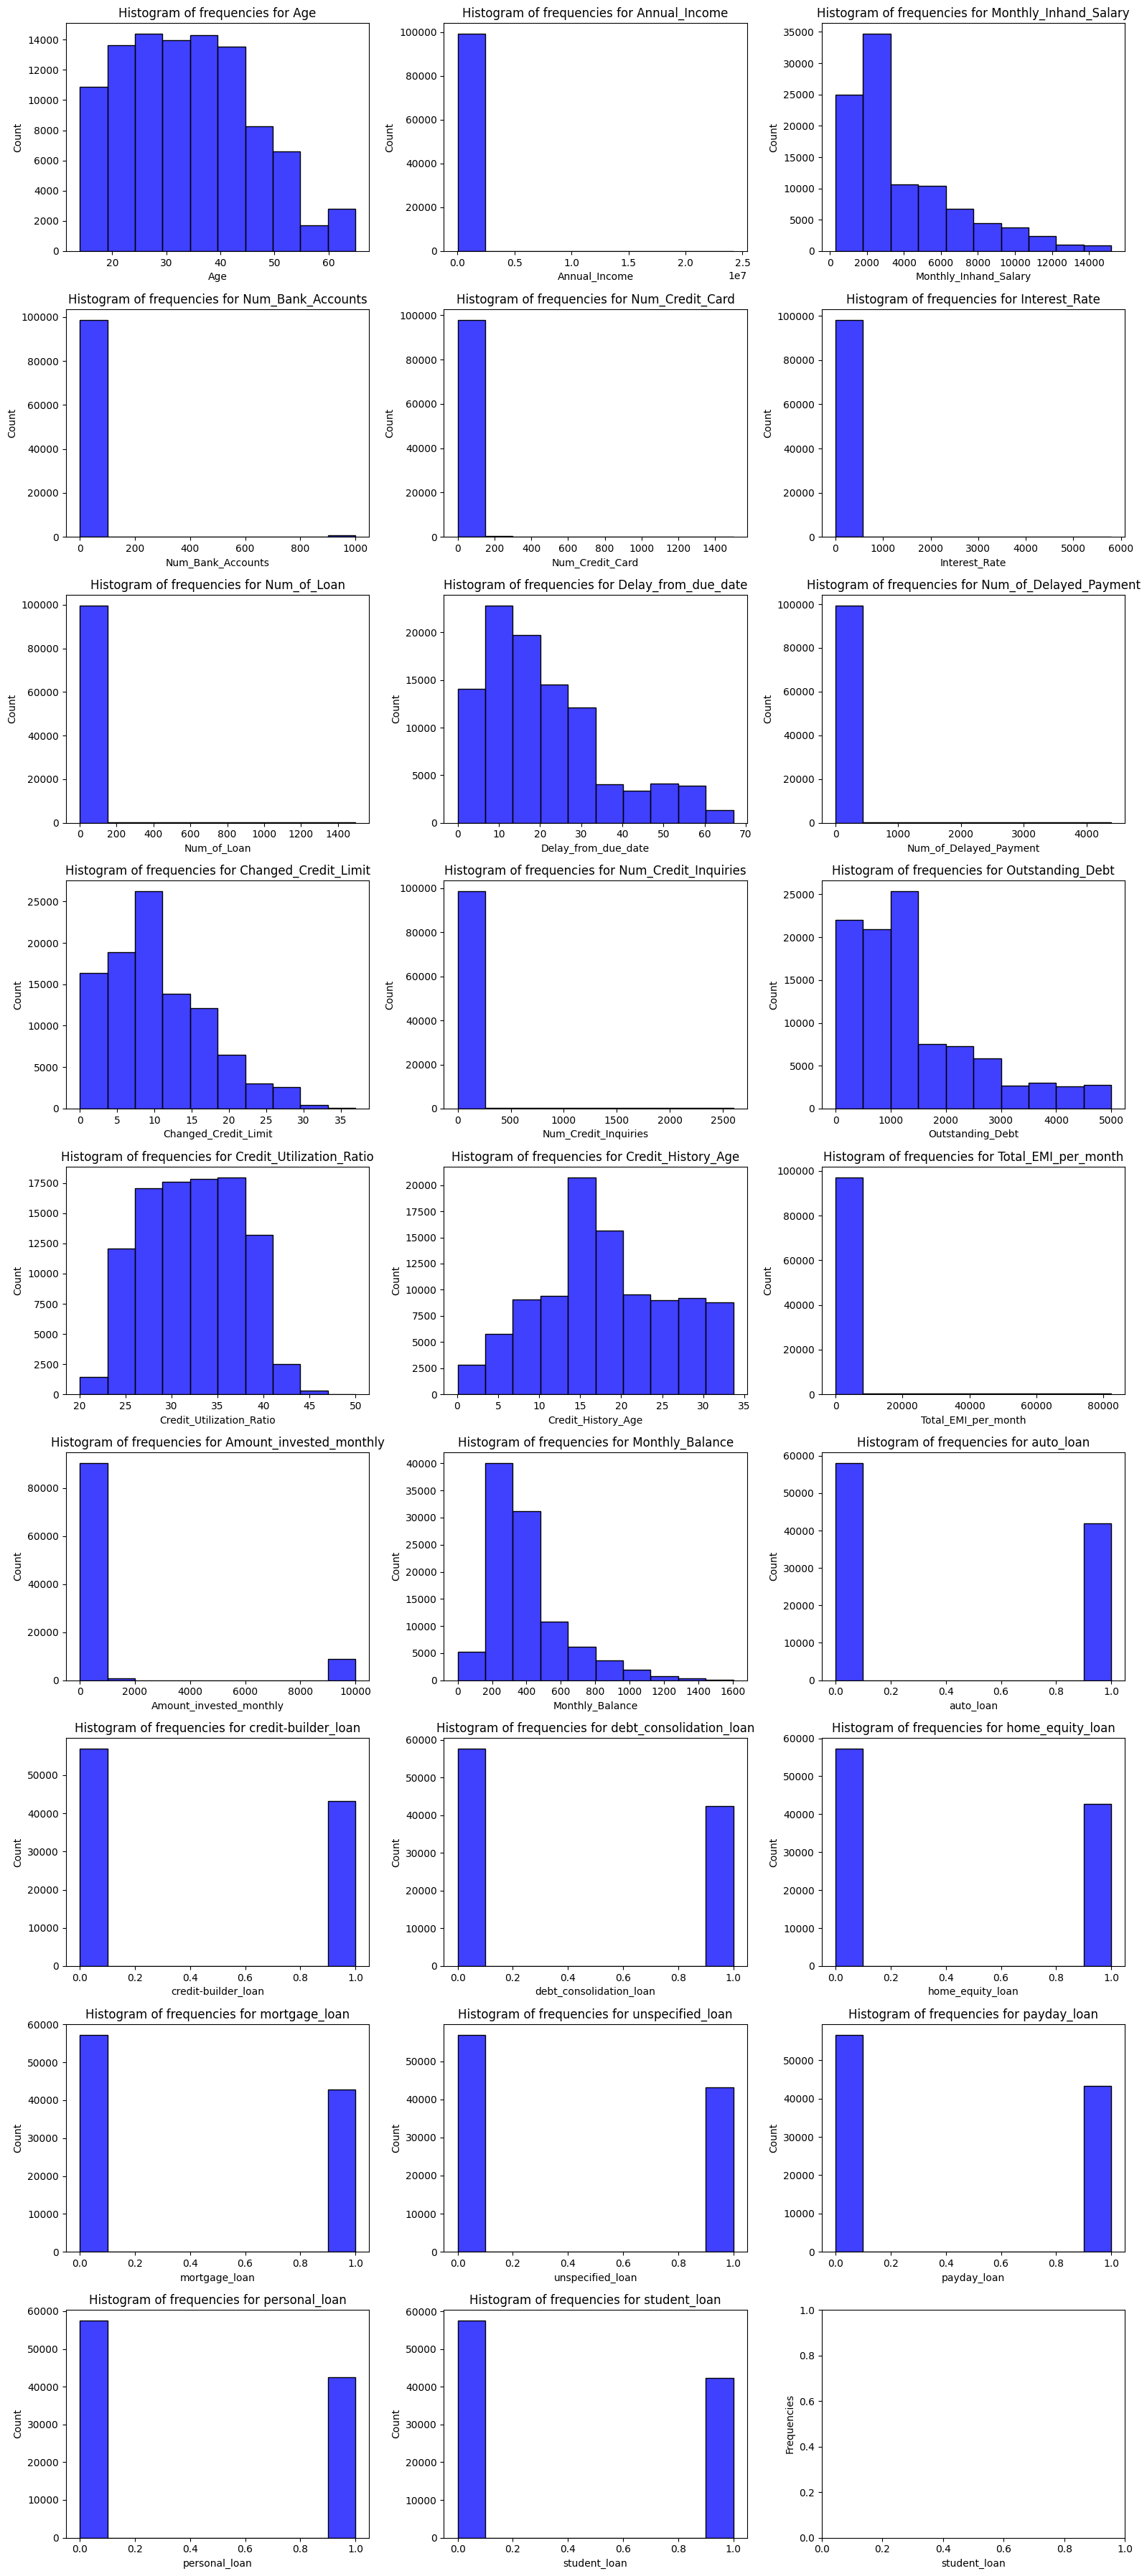

In [17]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

In [18]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Month ******
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

***** Occupation ******
Occupation
                 7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

***** Credit_Mix ******
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

***** Payment_of_Min_Amount ******
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

***** Payment_Behaviour ******
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540

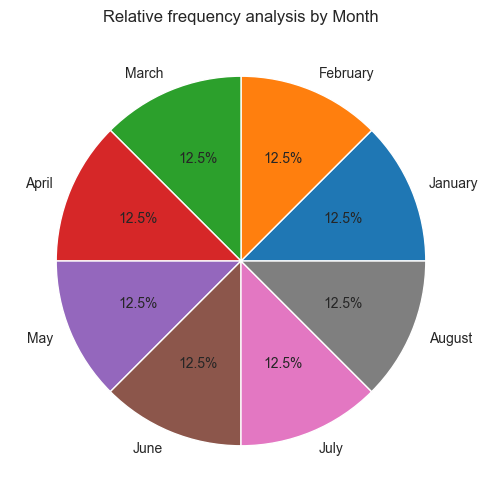

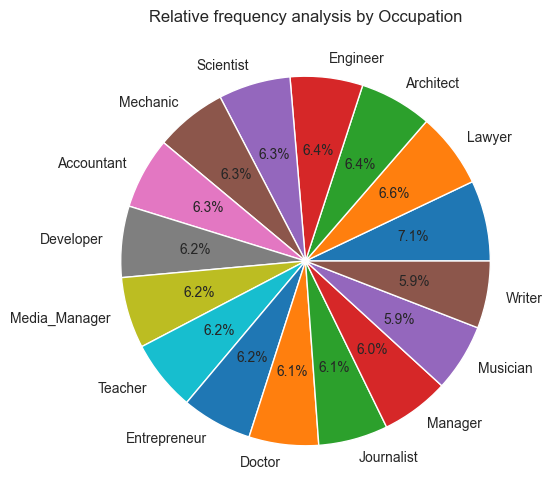

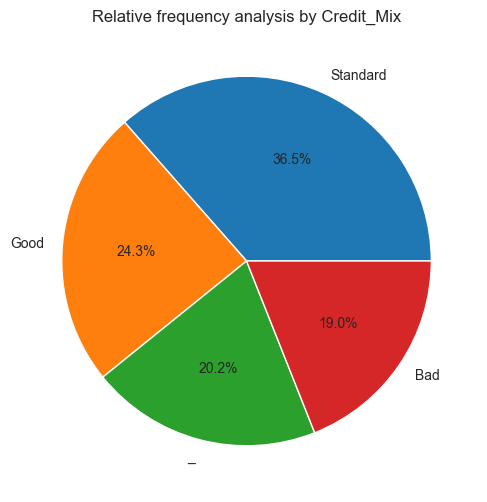

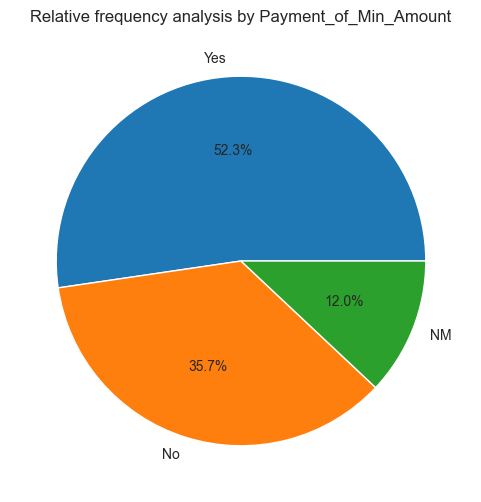

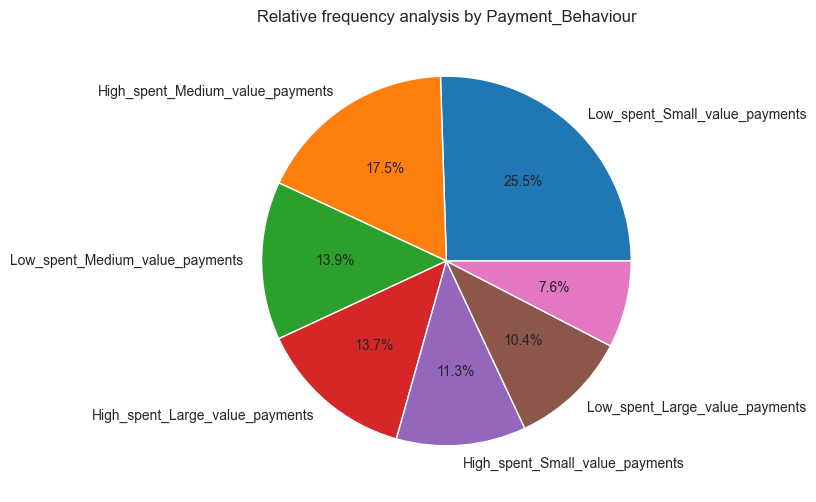

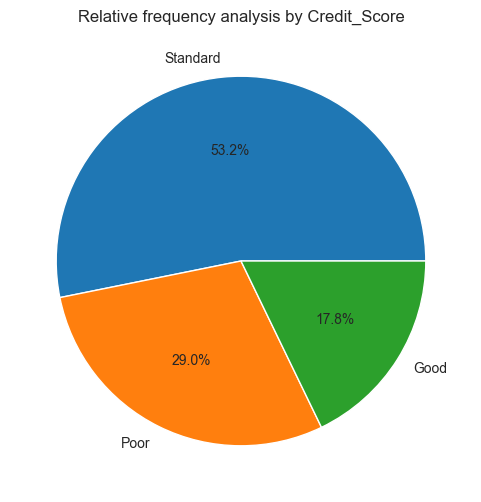

In [19]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

#### 4. Data preprocessing

In [20]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "Credit_Score"]
y = dataset["Credit_Score"]

In [21]:
x.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,auto_loan,credit-builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,unspecified_loan,payday_loan,personal_loan,student_loan
0,January,23,Scientist,19114.12,1824.843333,3.0,4,3,4,3,...,312.494089,True,True,False,True,False,False,False,True,False
1,February,23,Scientist,19114.12,3093.745000,3.0,4,3,4,1,...,284.629162,True,True,False,True,False,False,False,True,False
2,March,65,Scientist,19114.12,3093.745000,3.0,4,3,4,3,...,331.209863,True,True,False,True,False,False,False,True,False
3,April,23,Scientist,19114.12,3093.745000,3.0,4,3,4,5,...,223.451310,True,True,False,True,False,False,False,True,False
4,May,23,Scientist,19114.12,1824.843333,3.0,4,3,4,6,...,341.489231,True,True,False,True,False,False,False,True,False


In [22]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (100000, 31)
Dimension of target =  (100000,)


Split train and test set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (80000, 31)
Y-train:  80000
X-test dim:  (20000, 31)
Y-test:  20000


Transforming the numerical and categorical features  

* Numerical features: 
 ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',   'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',   'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',   'auto_loan', 'credit-builder_loan', 'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan', 'unspecified_loan',   'payday_loan', 'personal_loan', 'student_loan']    
  
* Categorical features:   
 ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']  

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["Age", "Delay_from_due_date", "Changed_Credit_Limit", "Credit_Utilization_Ratio", 
                        "Credit_History_Age", "Monthly_Balance"]),  
    (RobustScaler(), ["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", 
                      "Interest_Rate", "Num_of_Loan", "Num_of_Delayed_Payment", "Num_Credit_Inquiries", 
                      "Outstanding_Debt", "Total_EMI_per_month", "Amount_invested_monthly"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Month", "Occupation", "Credit_Mix", 
                                              "Payment_of_Min_Amount", "Payment_Behaviour"])    
)

In [27]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Delay_from_due_date',
                                  'Changed_Credit_Limit',
                                  'Credit_Utilization_Ratio',
                                  'Credit_History_Age', 'Monthly_Balance']),
                                ('robustscaler', RobustScaler(),
                                 ['Annual_Income', 'Monthly_Inhand_Salary',
                                  'Num_Bank_Accounts', 'Num_Credit_Card',
                                  'Interest_Rate', 'Num_of_Loan',
                                  'Num_of_Delayed_Payment',
                                  'Num_Credit_Inquiries', 'Outstanding_Debt',
                                  'Total_EMI_per_month',
                                  'Amount_invested_monthly']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Month', 'Occupation', 'Credit_Mix',
                                  'Payment_of_Min_Amount',
                                  'Payment_Behaviour'])])

In [28]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [29]:
x_train

array([[-1.03247054,  1.07225098, -0.42087234, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23707492,  0.39724834, -0.33326226, ...,  0.        ,
         0.        ,  1.        ],
       [-0.10147054, -0.75025616,  1.02167305, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.94783418, -1.4252588 , -0.0462637 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76052947,  0.26224781, -0.10517393, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.60689311, -0.41275484, -1.29546269, ...,  0.        ,
         0.        ,  1.        ]])

In [30]:
y_train

10382        Poor
73171        Poor
30938        Poor
99310        Good
58959        Poor
           ...   
21243    Standard
45891        Poor
42613        Good
43567        Good
68268        Poor
Name: Credit_Score, Length: 80000, dtype: object

#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier